In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

master_df = pd.read_csv("master.csv")

# Ensure that the index is sorted
master_df = master_df.sort_index()

# Define the window size
window_size = 30

# Select only the relevant columns
data = master_df[['evap', 'GWS', 'Rain_f_ta', 'SWE', 'Tair_f_tavg', 'TWS', 'Q', 'value_mgL']]


In [3]:
data.head(35)

,evap,GWS,Rain_f_ta,SWE,Tair_f_tavg,TWS,Q,value_mgL
0,0.000134,1355.841064,4.758085e-07,32.474033,264.929535,1599.702271,0.003768,NaN
1,0.000074,1355.867798,1.472223e-06,22.969460,260.363312,1590.059570,0.003078,NaN
2,0.000081,1355.743408,2.042398e-05,18.499897,263.606293,1585.215088,0.002452,NaN
3,0.000080,1355.505737,9.216375e-05,17.172014,266.839752,1583.431763,0.002017,NaN
4,0.000034,1355.300537,2.777230e-05,16.777233,263.835114,1582.685913,0.001921,NaN
5,0.000060,1355.049561,0.000000e+00,14.420487,261.595673,1579.915161,0.001872,NaN
6,0.000027,1354.711060,2.952464e-07,11.106107,261.477997,1576.085327,0.001723,NaN
7,0.000020,1354.391235,0.000000e+00,9.500694,262.178680,1574.012329,0.001598,NaN
8,0.000030,1353.983521,0.000000e+00,7.655660,260.566895,1571.599976,0.003342,NaN
9,0.000012,1353.576172,0.000000e+00,6.508490,260.992981,1569.892090,0.002947,NaN


In [4]:
def df_to_X_y2(df, window_size=30):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][-1]
    y.append(label)
    
  return np.array(X), np.array(y)

In [5]:
X2, y2 = df_to_X_y2(data)
X2.shape, y2.shape

[[1.33866488e-04 1.35584106e+03 4.75808548e-07 ... 1.59970227e+03
  3.76819400e-03            nan]
 [7.36526781e-05 1.35586780e+03 1.47222318e-06 ... 1.59005957e+03
  3.07847200e-03            nan]
 [8.12944927e-05 1.35574341e+03 2.04239750e-05 ... 1.58521509e+03
  2.45194400e-03            nan]
 ...
 [1.46398907e-05 1.67962903e+03 1.43110838e-05 ... 1.98350708e+03
             nan            nan]
 [1.24780745e-05 1.67940466e+03 5.14903604e-06 ... 1.98263916e+03
             nan            nan]
 [2.03579675e-05 1.67899243e+03 0.00000000e+00 ... 1.98077942e+03
             nan            nan]]
[[1.33866488e-04 1.35584106e+03 4.75808548e-07 ... 1.59970227e+03
  3.76819400e-03            nan]
 [7.36526781e-05 1.35586780e+03 1.47222318e-06 ... 1.59005957e+03
  3.07847200e-03            nan]
 [8.12944927e-05 1.35574341e+03 2.04239750e-05 ... 1.58521509e+03
  2.45194400e-03            nan]
 ...
 [1.46398907e-05 1.67962903e+03 1.43110838e-05 ... 1.98350708e+03
             nan            nan]

[[1.33866488e-04 1.35584106e+03 4.75808548e-07 ... 1.59970227e+03
  3.76819400e-03            nan]
 [7.36526781e-05 1.35586780e+03 1.47222318e-06 ... 1.59005957e+03
  3.07847200e-03            nan]
 [8.12944927e-05 1.35574341e+03 2.04239750e-05 ... 1.58521509e+03
  2.45194400e-03            nan]
 ...
 [1.46398907e-05 1.67962903e+03 1.43110838e-05 ... 1.98350708e+03
             nan            nan]
 [1.24780745e-05 1.67940466e+03 5.14903604e-06 ... 1.98263916e+03
             nan            nan]
 [2.03579675e-05 1.67899243e+03 0.00000000e+00 ... 1.98077942e+03
             nan            nan]]
[[1.33866488e-04 1.35584106e+03 4.75808548e-07 ... 1.59970227e+03
  3.76819400e-03            nan]
 [7.36526781e-05 1.35586780e+03 1.47222318e-06 ... 1.59005957e+03
  3.07847200e-03            nan]
 [8.12944927e-05 1.35574341e+03 2.04239750e-05 ... 1.58521509e+03
  2.45194400e-03            nan]
 ...
 [1.46398907e-05 1.67962903e+03 1.43110838e-05 ... 1.98350708e+03
             nan            nan]

[[1.33866488e-04 1.35584106e+03 4.75808548e-07 ... 1.59970227e+03
  3.76819400e-03            nan]
 [7.36526781e-05 1.35586780e+03 1.47222318e-06 ... 1.59005957e+03
  3.07847200e-03            nan]
 [8.12944927e-05 1.35574341e+03 2.04239750e-05 ... 1.58521509e+03
  2.45194400e-03            nan]
 ...
 [1.46398907e-05 1.67962903e+03 1.43110838e-05 ... 1.98350708e+03
             nan            nan]
 [1.24780745e-05 1.67940466e+03 5.14903604e-06 ... 1.98263916e+03
             nan            nan]
 [2.03579675e-05 1.67899243e+03 0.00000000e+00 ... 1.98077942e+03
             nan            nan]]
[[1.33866488e-04 1.35584106e+03 4.75808548e-07 ... 1.59970227e+03
  3.76819400e-03            nan]
 [7.36526781e-05 1.35586780e+03 1.47222318e-06 ... 1.59005957e+03
  3.07847200e-03            nan]
 [8.12944927e-05 1.35574341e+03 2.04239750e-05 ... 1.58521509e+03
  2.45194400e-03            nan]
 ...
 [1.46398907e-05 1.67962903e+03 1.43110838e-05 ... 1.98350708e+03
             nan            nan]

[[1.33866488e-04 1.35584106e+03 4.75808548e-07 ... 1.59970227e+03
  3.76819400e-03            nan]
 [7.36526781e-05 1.35586780e+03 1.47222318e-06 ... 1.59005957e+03
  3.07847200e-03            nan]
 [8.12944927e-05 1.35574341e+03 2.04239750e-05 ... 1.58521509e+03
  2.45194400e-03            nan]
 ...
 [1.46398907e-05 1.67962903e+03 1.43110838e-05 ... 1.98350708e+03
             nan            nan]
 [1.24780745e-05 1.67940466e+03 5.14903604e-06 ... 1.98263916e+03
             nan            nan]
 [2.03579675e-05 1.67899243e+03 0.00000000e+00 ... 1.98077942e+03
             nan            nan]]
[[1.33866488e-04 1.35584106e+03 4.75808548e-07 ... 1.59970227e+03
  3.76819400e-03            nan]
 [7.36526781e-05 1.35586780e+03 1.47222318e-06 ... 1.59005957e+03
  3.07847200e-03            nan]
 [8.12944927e-05 1.35574341e+03 2.04239750e-05 ... 1.58521509e+03
  2.45194400e-03            nan]
 ...
 [1.46398907e-05 1.67962903e+03 1.43110838e-05 ... 1.98350708e+03
             nan            nan]

[[1.33866488e-04 1.35584106e+03 4.75808548e-07 ... 1.59970227e+03
  3.76819400e-03            nan]
 [7.36526781e-05 1.35586780e+03 1.47222318e-06 ... 1.59005957e+03
  3.07847200e-03            nan]
 [8.12944927e-05 1.35574341e+03 2.04239750e-05 ... 1.58521509e+03
  2.45194400e-03            nan]
 ...
 [1.46398907e-05 1.67962903e+03 1.43110838e-05 ... 1.98350708e+03
             nan            nan]
 [1.24780745e-05 1.67940466e+03 5.14903604e-06 ... 1.98263916e+03
             nan            nan]
 [2.03579675e-05 1.67899243e+03 0.00000000e+00 ... 1.98077942e+03
             nan            nan]]
[[1.33866488e-04 1.35584106e+03 4.75808548e-07 ... 1.59970227e+03
  3.76819400e-03            nan]
 [7.36526781e-05 1.35586780e+03 1.47222318e-06 ... 1.59005957e+03
  3.07847200e-03            nan]
 [8.12944927e-05 1.35574341e+03 2.04239750e-05 ... 1.58521509e+03
  2.45194400e-03            nan]
 ...
 [1.46398907e-05 1.67962903e+03 1.43110838e-05 ... 1.98350708e+03
             nan            nan]

[[1.33866488e-04 1.35584106e+03 4.75808548e-07 ... 1.59970227e+03
  3.76819400e-03            nan]
 [7.36526781e-05 1.35586780e+03 1.47222318e-06 ... 1.59005957e+03
  3.07847200e-03            nan]
 [8.12944927e-05 1.35574341e+03 2.04239750e-05 ... 1.58521509e+03
  2.45194400e-03            nan]
 ...
 [1.46398907e-05 1.67962903e+03 1.43110838e-05 ... 1.98350708e+03
             nan            nan]
 [1.24780745e-05 1.67940466e+03 5.14903604e-06 ... 1.98263916e+03
             nan            nan]
 [2.03579675e-05 1.67899243e+03 0.00000000e+00 ... 1.98077942e+03
             nan            nan]]
[[1.33866488e-04 1.35584106e+03 4.75808548e-07 ... 1.59970227e+03
  3.76819400e-03            nan]
 [7.36526781e-05 1.35586780e+03 1.47222318e-06 ... 1.59005957e+03
  3.07847200e-03            nan]
 [8.12944927e-05 1.35574341e+03 2.04239750e-05 ... 1.58521509e+03
  2.45194400e-03            nan]
 ...
 [1.46398907e-05 1.67962903e+03 1.43110838e-05 ... 1.98350708e+03
             nan            nan]

[[1.33866488e-04 1.35584106e+03 4.75808548e-07 ... 1.59970227e+03
  3.76819400e-03            nan]
 [7.36526781e-05 1.35586780e+03 1.47222318e-06 ... 1.59005957e+03
  3.07847200e-03            nan]
 [8.12944927e-05 1.35574341e+03 2.04239750e-05 ... 1.58521509e+03
  2.45194400e-03            nan]
 ...
 [1.46398907e-05 1.67962903e+03 1.43110838e-05 ... 1.98350708e+03
             nan            nan]
 [1.24780745e-05 1.67940466e+03 5.14903604e-06 ... 1.98263916e+03
             nan            nan]
 [2.03579675e-05 1.67899243e+03 0.00000000e+00 ... 1.98077942e+03
             nan            nan]]
[[1.33866488e-04 1.35584106e+03 4.75808548e-07 ... 1.59970227e+03
  3.76819400e-03            nan]
 [7.36526781e-05 1.35586780e+03 1.47222318e-06 ... 1.59005957e+03
  3.07847200e-03            nan]
 [8.12944927e-05 1.35574341e+03 2.04239750e-05 ... 1.58521509e+03
  2.45194400e-03            nan]
 ...
 [1.46398907e-05 1.67962903e+03 1.43110838e-05 ... 1.98350708e+03
             nan            nan]

((4789, 30, 8), (4789,))

In [6]:
# Assuming y2 is your NumPy array
non_nan_count = np.count_nonzero(~np.isnan(y2))
print("Number of non-NaN values:", non_nan_count)

Number of non-NaN values: 133


In [7]:
X2_train, y2_train = X2[:3000], y2[:3000]
X2_val, y2_val = X2[3000:4000], y2[3000:4000]
X2_test, y2_test = X2[4000:], y2[4000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((3000, 30, 8), (3000,), (1000, 30, 8), (1000,), (789, 30, 8), (789,))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [9]:
model4 = Sequential()
model4.add(InputLayer((30, 8)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18688     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 19217 (75.07 KB)
Trainable params: 19217 (75.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
import tensorflow as tf
from tensorflow.keras.losses import Loss

class CustomLoss(Loss):
    def __init__(self, reduction=tf.keras.losses.Reduction.NONE, name='custom_loss'):
        super().__init__(reduction=reduction, name=name)

    def call(self, y_true, y_pred):
        mask = ~tf.math.is_nan(y_true)
        y_true = tf.boolean_mask(y_true, mask)
        y_pred = tf.boolean_mask(y_pred, mask)
        denominator = tf.reduce_sum(tf.cast(mask, tf.float32)) + 1e-10
        loss = tf.reduce_sum(tf.square(y_true - y_pred)) / denominator
        return loss

In [11]:
custom_loss = CustomLoss()
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=custom_loss, optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [12]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=30, callbacks=[cp4])

Epoch 1/30

87/94 [==========================>...] - ETA: 0s - loss: 4.1654 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 5s 38ms/step - loss: 4.3143 - root_mean_squared_error: nan - val_loss: 6.6369 - val_root_mean_squared_error: nan
Epoch 2/30
92/94 [============================>.] - ETA: 0s - loss: 4.5058 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 33ms/step - loss: 4.4833 - root_mean_squared_error: nan - val_loss: 6.6028 - val_root_mean_squared_error: nan
Epoch 3/30
90/94 [===========================>..] - ETA: 0s - loss: 4.3457 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 29ms/step - loss: 4.3942 - root_mean_squared_error: nan - val_loss: 6.5694 - val_root_mean_squared_error: nan
Epoch 4/30
92/94 [============================>.] - ETA: 0s - loss: 4.5518 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 31ms/step - loss: 4.5134 - root_mean_squared_error: nan - val_loss: 6.5352 - val_root_mean_squared_error: nan
Epoch 5/30
88/94 [===========================>..] - ETA: 0s - loss: 4.3807 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 31ms/step - loss: 4.3674 - root_mean_squared_error: nan - val_loss: 6.5021 - val_root_mean_squared_error: nan
Epoch 6/30
87/94 [==========================>...] - ETA: 0s - loss: 4.5419 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 34ms/step - loss: 4.4680 - root_mean_squared_error: nan - val_loss: 6.4680 - val_root_mean_squared_error: nan
Epoch 7/30
92/94 [============================>.] - ETA: 0s - loss: 4.1075 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 32ms/step - loss: 4.0309 - root_mean_squared_error: nan - val_loss: 6.4372 - val_root_mean_squared_error: nan
Epoch 8/30
93/94 [============================>.] - ETA: 0s - loss: 4.2481 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 34ms/step - loss: 4.2141 - root_mean_squared_error: nan - val_loss: 6.4048 - val_root_mean_squared_error: nan
Epoch 9/30
92/94 [============================>.] - ETA: 0s - loss: 4.1105 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 30ms/step - loss: 4.1093 - root_mean_squared_error: nan - val_loss: 6.3745 - val_root_mean_squared_error: nan
Epoch 10/30
88/94 [===========================>..] - ETA: 0s - loss: 4.2008 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 29ms/step - loss: 4.1795 - root_mean_squared_error: nan - val_loss: 6.3408 - val_root_mean_squared_error: nan
Epoch 11/30
88/94 [===========================>..] - ETA: 0s - loss: 4.1199 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 33ms/step - loss: 3.9530 - root_mean_squared_error: nan - val_loss: 6.3099 - val_root_mean_squared_error: nan
Epoch 12/30
88/94 [===========================>..] - ETA: 0s - loss: 3.8090 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 30ms/step - loss: 3.8931 - root_mean_squared_error: nan - val_loss: 6.2803 - val_root_mean_squared_error: nan
Epoch 13/30
93/94 [============================>.] - ETA: 0s - loss: 4.0879 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 33ms/step - loss: 4.0552 - root_mean_squared_error: nan - val_loss: 6.2486 - val_root_mean_squared_error: nan
Epoch 14/30
87/94 [==========================>...] - ETA: 0s - loss: 4.1053 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 29ms/step - loss: 4.0084 - root_mean_squared_error: nan - val_loss: 6.2161 - val_root_mean_squared_error: nan
Epoch 15/30
93/94 [============================>.] - ETA: 0s - loss: 4.1287 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 30ms/step - loss: 4.1226 - root_mean_squared_error: nan - val_loss: 6.1844 - val_root_mean_squared_error: nan
Epoch 16/30
87/94 [==========================>...] - ETA: 0s - loss: 4.1186 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 32ms/step - loss: 4.2407 - root_mean_squared_error: nan - val_loss: 6.1516 - val_root_mean_squared_error: nan
Epoch 17/30
93/94 [============================>.] - ETA: 0s - loss: 3.5897 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 28ms/step - loss: 3.6327 - root_mean_squared_error: nan - val_loss: 6.1228 - val_root_mean_squared_error: nan
Epoch 18/30
89/94 [===========================>..] - ETA: 0s - loss: 4.3677 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 32ms/step - loss: 4.4915 - root_mean_squared_error: nan - val_loss: 6.0877 - val_root_mean_squared_error: nan
Epoch 19/30
93/94 [============================>.] - ETA: 0s - loss: 4.0675 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 31ms/step - loss: 4.1158 - root_mean_squared_error: nan - val_loss: 6.0542 - val_root_mean_squared_error: nan
Epoch 20/30
93/94 [============================>.] - ETA: 0s - loss: 3.4838 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 29ms/step - loss: 3.4560 - root_mean_squared_error: nan - val_loss: 6.0265 - val_root_mean_squared_error: nan
Epoch 21/30
91/94 [============================>.] - ETA: 0s - loss: 3.8873 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 33ms/step - loss: 3.9849 - root_mean_squared_error: nan - val_loss: 5.9963 - val_root_mean_squared_error: nan
Epoch 22/30
89/94 [===========================>..] - ETA: 0s - loss: 3.9288 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 31ms/step - loss: 3.8703 - root_mean_squared_error: nan - val_loss: 5.9646 - val_root_mean_squared_error: nan
Epoch 23/30
93/94 [============================>.] - ETA: 0s - loss: 4.2379 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 31ms/step - loss: 4.2040 - root_mean_squared_error: nan - val_loss: 5.9320 - val_root_mean_squared_error: nan
Epoch 24/30
88/94 [===========================>..] - ETA: 0s - loss: 4.2312 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 29ms/step - loss: 4.1462 - root_mean_squared_error: nan - val_loss: 5.8986 - val_root_mean_squared_error: nan
Epoch 25/30
93/94 [============================>.] - ETA: 0s - loss: 3.5879 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 29ms/step - loss: 3.6246 - root_mean_squared_error: nan - val_loss: 5.8698 - val_root_mean_squared_error: nan
Epoch 26/30
94/94 [==============================] - ETA: 0s - loss: 3.8732 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 30ms/step - loss: 3.8732 - root_mean_squared_error: nan - val_loss: 5.8395 - val_root_mean_squared_error: nan
Epoch 27/30
91/94 [============================>.] - ETA: 0s - loss: 3.8338 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 2s 27ms/step - loss: 3.8011 - root_mean_squared_error: nan - val_loss: 5.8079 - val_root_mean_squared_error: nan
Epoch 28/30
91/94 [============================>.] - ETA: 0s - loss: 3.9241 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 29ms/step - loss: 4.0048 - root_mean_squared_error: nan - val_loss: 5.7775 - val_root_mean_squared_error: nan
Epoch 29/30
94/94 [==============================] - ETA: 0s - loss: 3.7734 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 28ms/step - loss: 3.7734 - root_mean_squared_error: nan - val_loss: 5.7473 - val_root_mean_squared_error: nan
Epoch 30/30
92/94 [============================>.] - ETA: 0s - loss: 3.4113 - root_mean_squared_error: nanINFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


94/94 [==============================] - 3s 30ms/step - loss: 3.3768 - root_mean_squared_error: nan - val_loss: 5.7194 - val_root_mean_squared_error: nan


In [13]:
data1 = data

In [14]:
data1 = data1.dropna()

In [15]:
X3, y3 = df_to_X_y2(data1)
X3.shape, y3.shape

[[8.23718801e-06 1.35060901e+03 0.00000000e+00 ... 1.56163306e+03
  1.38125000e-03 1.96792722e+00]
 [1.73791395e-05 1.36236670e+03 2.92513141e-05 ... 1.58735242e+03
  1.72250000e-03 1.95390398e+00]
 [1.31379202e-05 1.35996216e+03 0.00000000e+00 ... 1.57167859e+03
  2.35444400e-03 1.93988075e+00]
 ...
 [1.99995793e-05 1.61912524e+03 0.00000000e+00 ... 1.88017322e+03
  7.13736100e-03 3.07576273e+00]
 [6.09519975e-06 1.65328467e+03 7.60099647e-05 ... 1.93563354e+03
  2.81305600e-03 3.17392537e+00]
 [2.05469642e-05 1.67022864e+03 0.00000000e+00 ... 1.96879871e+03
  1.24240300e-02 2.83269334e+00]]
[[8.23718801e-06 1.35060901e+03 0.00000000e+00 ... 1.56163306e+03
  1.38125000e-03 1.96792722e+00]
 [1.73791395e-05 1.36236670e+03 2.92513141e-05 ... 1.58735242e+03
  1.72250000e-03 1.95390398e+00]
 [1.31379202e-05 1.35996216e+03 0.00000000e+00 ... 1.57167859e+03
  2.35444400e-03 1.93988075e+00]
 ...
 [1.99995793e-05 1.61912524e+03 0.00000000e+00 ... 1.88017322e+03
  7.13736100e-03 3.07576273e+00]

((104, 30, 8), (104,))

In [16]:
X3_train, y3_train = X3[:50], y3[:50]
X3_val, y3_val = X3[50:78], y3[50:78]
X3_test, y3_test = X3[78:], y3[78:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape


((50, 30, 8), (50,), (28, 30, 8), (28,), (26, 30, 8), (26,))

In [17]:
model5 = Sequential()
model5.add(InputLayer((30, 8)))
model5.add(LSTM(128, return_sequences=True))
model5.add(LSTM(256))
model5.add(Dense(8, activation='relu'))
model5.add(Dense(1, activation='linear'))

model5.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 30, 128)           70144     
                                                                 
 lstm_2 (LSTM)               (None, 256)               394240    
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 466449 (1.78 MB)
Trainable params: 466449 (1.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001))

In [19]:
history = model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=100, callbacks=[cp4])

Epoch 1/100
2/2 [==============================] - 3s 535ms/step - loss: 9.1214 - val_loss: 7.1784
Epoch 2/100
2/2 [==============================] - 0s 77ms/step - loss: 7.7088 - val_loss: 6.5121
Epoch 3/100
2/2 [==============================] - 0s 74ms/step - loss: 6.9969 - val_loss: 5.8287
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 6.3785INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 4s 4s/step - loss: 6.2872 - val_loss: 5.1519
Epoch 5/100
1/2 [==============>...............] - ETA: 0s - loss: 5.5172INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 4s 4s/step - loss: 5.5726 - val_loss: 4.4955
Epoch 6/100
1/2 [==============>...............] - ETA: 0s - loss: 5.0608INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 4s 4s/step - loss: 4.8822 - val_loss: 3.8649
Epoch 7/100
1/2 [==============>...............] - ETA: 0s - loss: 4.6575INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 4s 4s/step - loss: 4.2160 - val_loss: 3.2648
Epoch 8/100
1/2 [==============>...............] - ETA: 0s - loss: 3.7177INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 4s 4s/step - loss: 3.5715 - val_loss: 2.7046
Epoch 9/100
1/2 [==============>...............] - ETA: 0s - loss: 3.1169INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 4s 4s/step - loss: 2.9737 - val_loss: 2.1846
Epoch 10/100
1/2 [==============>...............] - ETA: 0s - loss: 2.4679INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 4s 4s/step - loss: 2.4087 - val_loss: 1.7061
Epoch 11/100
1/2 [==============>...............] - ETA: 0s - loss: 2.0957INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 3s 3s/step - loss: 1.9004 - val_loss: 1.2755
Epoch 12/100
1/2 [==============>...............] - ETA: 0s - loss: 1.3944INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 4s 4s/step - loss: 1.4280 - val_loss: 0.9024
Epoch 13/100
1/2 [==============>...............] - ETA: 0s - loss: 1.1545INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 4s 4s/step - loss: 1.0372 - val_loss: 0.5946
Epoch 14/100
1/2 [==============>...............] - ETA: 0s - loss: 0.7812INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 3s 3s/step - loss: 0.7079 - val_loss: 0.3613
Epoch 15/100
1/2 [==============>...............] - ETA: 0s - loss: 0.5552INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 4s 4s/step - loss: 0.4543 - val_loss: 0.2063
Epoch 16/100
1/2 [==============>...............] - ETA: 0s - loss: 0.3243INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 3s 3s/step - loss: 0.2750 - val_loss: 0.1272
Epoch 17/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1979INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 4s 4s/step - loss: 0.1720 - val_loss: 0.1138
Epoch 18/100
2/2 [==============================] - 0s 82ms/step - loss: 0.1361 - val_loss: 0.1486
Epoch 19/100
2/2 [==============================] - 0s 75ms/step - loss: 0.1548 - val_loss: 0.2052
Epoch 20/100
2/2 [==============================] - 0s 84ms/step - loss: 0.1833 - val_loss: 0.2535
Epoch 21/100
2/2 [==============================] - 0s 81ms/step - loss: 0.2176 - val_loss: 0.2810
Epoch 22/100
2/2 [==============================] - 0s 86ms/step - loss: 0.2327 - val_loss: 0.2831
Epoch 23/100
2/2 [==============================] - 0s 81ms/step - loss: 0.2314 - val_loss: 0.2672
Epoch 24/100
2/2 [==============================] - 0s 87ms/step - loss: 0.2176 - val_loss: 0.2395
Epoch 25/100
2/2 [==============================] - 0s 80ms/step - loss: 0.1953 - val_loss: 0.2085
Epoch 26/100
2/2 [==============================] - 0s 82ms/step - loss: 0.1754 - val_loss: 0.1788
Epoch 27/100
2/2 [=======

INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 4s 4s/step - loss: 0.1379 - val_loss: 0.1136
Epoch 33/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0942INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 4s 4s/step - loss: 0.1390 - val_loss: 0.1129
Epoch 34/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1162INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


2/2 [==============================] - 4s 4s/step - loss: 0.1409 - val_loss: 0.1126
Epoch 35/100
2/2 [==============================] - 0s 80ms/step - loss: 0.1414 - val_loss: 0.1127
Epoch 36/100
2/2 [==============================] - 0s 76ms/step - loss: 0.1409 - val_loss: 0.1130
Epoch 37/100
2/2 [==============================] - 0s 78ms/step - loss: 0.1404 - val_loss: 0.1139
Epoch 38/100
2/2 [==============================] - 0s 82ms/step - loss: 0.1383 - val_loss: 0.1149
Epoch 39/100
2/2 [==============================] - 0s 74ms/step - loss: 0.1370 - val_loss: 0.1166
Epoch 40/100
2/2 [==============================] - 0s 77ms/step - loss: 0.1362 - val_loss: 0.1190
Epoch 41/100
2/2 [==============================] - 0s 73ms/step - loss: 0.1353 - val_loss: 0.1215
Epoch 42/100
2/2 [==============================] - 0s 75ms/step - loss: 0.1352 - val_loss: 0.1241
Epoch 43/100
2/2 [==============================] - 0s 80ms/step - loss: 0.1351 - val_loss: 0.1262
Epoch 44/100
2/2 [=======

In [20]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

1/1 [==============================] - 1s 1s/step


(    Predictions   Actuals
 0      2.924786  3.192623
 1      2.924383  3.019670
 2      2.925055  2.753228
 3      2.925617  2.430694
 4      2.928178  2.519508
 5      2.928663  2.313834
 6      2.929708  2.262415
 7      2.928736  2.458740
 8      2.928283  3.029019
 9      2.927060  3.281437
 10     2.926940  3.113158
 11     2.926134  3.173925
 12     2.925439  2.958902
 13     2.925518  3.211321
 14     2.926006  2.281113
 15     2.926621  2.935530
 16     2.927584  3.136530
 17     2.928374  2.313834
 18     2.928036  2.383950
 19     2.927727  2.856065
 20     2.926609  3.131856
 21     2.925894  3.253390
 22     2.925263  3.155228
 23     2.924767  3.075763
 24     2.924296  3.173925
 25     2.924606  2.832693,
 0.12751465857220395)

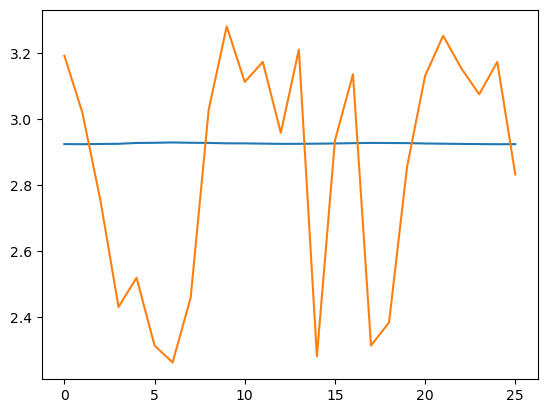

In [21]:
plot_predictions1(model5, X3_test, y3_test)

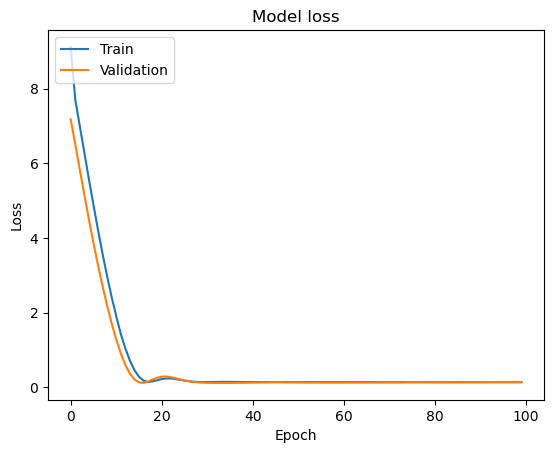

In [22]:


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()